In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [20]:
import mks_base
import mks_base.cahnHillSolver as solver
import mks_base.mks_localisation as model
import mks_base.legendre as legendre

In [12]:
from pymks.tools import draw_concentrations

/home/apaar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/apaar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
def error(X, Y):
    n = X.shape[0]*X.shape[1]
    return (np.sum((X-Y)**2))


def draw(X):
    plt.imshow(X)
    plt.colorbar()
    plt.show()
    
def draw_by_side(X, Y, title=None, title_left=None, title_right=None):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    fig.suptitle(title, fontsize=20)
    
    ax1.set_title(title_left)
    im1 = ax1.imshow(X,interpolation='nearest')
  
    ax2.set_title(title_right)
    im2 = ax2.imshow(Y,interpolation='nearest')
    
    plt.tight_layout()
    plt.show()

In [8]:
make_dataset = solver.make_dataset 

In [91]:
seed = 99
tsteps = 10
shape = (200, 101, 101)
dx = 0.1
dt = 0.001
gamma = 1.

In [92]:
%%time
X_train, y_train = make_dataset(seed, tsteps, shape, dx, dt, gamma)

CPU times: user 24.6 s, sys: 16 ms, total: 24.6 s
Wall time: 24.6 s


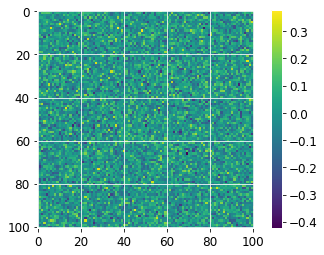

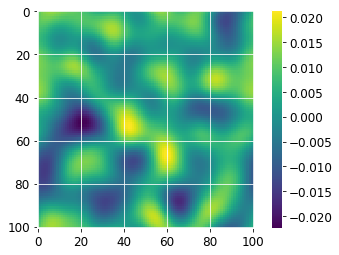

In [93]:
draw(X_train[0])
draw(y_train[0])

In [94]:
seed  = 37
shape = (5, 101, 101)
X_test, y_test = make_dataset(seed, tsteps, shape, dx, dt, gamma)

In [96]:
n_states_   = 6
domain_     = (-1, 1)
discretize_ = legendre.legendre_basis
coeff_      = model.fit(X_train, y_train, domain_, n_states_, discretize_)

In [97]:
y_predict = model.predict(X_test, coeff_, domain_, n_states_, discretize_)

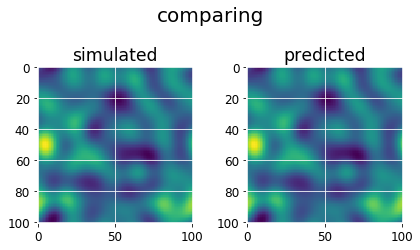

error =  1.50199622973e-11


In [98]:
draw_by_side(y_test[0], y_predict[0],"comparing", "simulated", "predicted")
print("error = ", (error(y_test[3],y_predict[3])))

In [111]:
seed  = 101
shape = (5, 101, 101)
print(tsteps)
X_t1, y_t1   = make_dataset(seed, tsteps, shape, dx, 1*dt, gamma)
steps = [1, 2, 5, 10, 15, 20]
for step in steps:
        y_p = X_t1.copy()
        y_s = X_t1.copy()
        y_l = X_t1.copy()
        for j in range(step):
            y_p = model.predict(y_p, coeff, domain_, n_states_, discretize_)
        for i in range(step*tsteps):
            y_s = solver.ch_solver(y_s, dx, dt, gamma)
        for k in range(tsteps):
            y_l = solver.ch_solver(y_l, dx, step*dt, gamma)
        print("error ground vs. predicted= ", (error(y_s[0],y_p[0])))
        print("error ground vs long sim  = ", (error(y_s[0],y_l[0])))

10
error ground vs. predicted=  1.38819553742e-11
error ground vs long sim  =  0.0
error ground vs. predicted=  2.15610752172e-11
error ground vs long sim  =  0.000207396046412
error ground vs. predicted=  4.15229880362e-11
error ground vs long sim  =  0.000619568875802
error ground vs. predicted=  6.68116992608e-11
error ground vs long sim  =  0.00109542855594
error ground vs. predicted=  9.69224871028e-11
error ground vs long sim  =  0.00123003921329
error ground vs. predicted=  1.3207899985e-10
error ground vs long sim  =  0.00123322590957


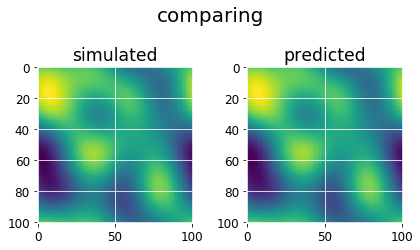

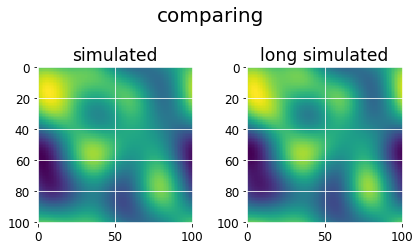

In [112]:
draw_by_side(y_s[0], y_p[0],"comparing", "simulated", "predicted")
draw_by_side(y_s[0], y_l[0],"comparing", "simulated", "long simulated")

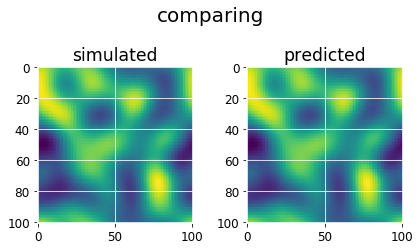

In [113]:
seed        = 88
shape       = (5, 101, 101)
tsteps      = 10
shape       = (200, 101, 101)
dx          = 0.1
dt          = 0.005
gamma       = 1.
X_train, y_train = make_dataset(seed, tsteps, shape, dx, dt, gamma)
seed        = 101
X_test, y_test = make_dataset(seed, tsteps, shape, dx, dt, gamma)
n_states_   = 6
domain_     = (-1, 1)
discretize_ = legendre.legendre_basis
coeff_      = model.fit(X_train, y_train, domain_, n_states_, discretize_)
y_predict   = model.predict(X_test, coeff_, domain_, n_states_, discretize_)
draw_by_side(y_test[0], y_predict[0],"comparing", "simulated", "predicted")

In [115]:
seed  = 71
shape = (5, 101, 101)
print(tsteps)
X_t1, y_t1   = make_dataset(seed, tsteps, shape, dx, 1*dt, gamma)
steps = [1, 2, 5, 10, 15, 20]
for step in steps:
        y_p = X_t1.copy()
        y_s = X_t1.copy()
        y_l = X_t1.copy()
        for j in range(step):
            y_p = model.predict(y_p, coeff_, domain_, n_states_, discretize_)
        for i in range(step*tsteps):
            y_s = solver.ch_solver(y_s, dx, dt, gamma)
        for k in range(tsteps):
            y_l = solver.ch_solver(y_l, dx, step*dt, gamma)
        print("error ground vs. predicted= ", (error(y_s[0],y_p[0])))
        print("error ground vs long sim  = ", (error(y_s[0],y_l[0])))

10
error ground vs. predicted=  3.8138339136e-11
error ground vs long sim  =  0.0
error ground vs. predicted=  5.63583163897e-11
error ground vs long sim  =  0.000287841230426
error ground vs. predicted=  1.08859441513e-10
error ground vs long sim  =  0.000774195760767
error ground vs. predicted=  2.00991005991e-10
error ground vs long sim  =  0.00100760704358
error ground vs. predicted=  2.63643310204e-10
error ground vs long sim  =  0.0014933184141
error ground vs. predicted=  3.13982808068e-10
error ground vs long sim  =  0.00209958112755


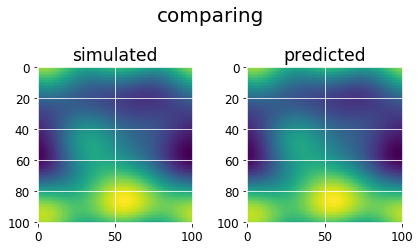

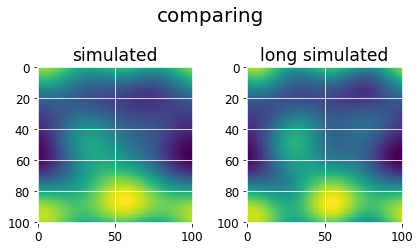

In [116]:
draw_by_side(y_s[0], y_p[0],"comparing", "simulated", "predicted")
draw_by_side(y_s[0], y_l[0],"comparing", "simulated", "long simulated")